In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pywt
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np
import os

# Define the path to the pre-processed data folder
preprocessed_data_folder = "/content/drive/MyDrive/Pre-processed Data/train"

# Initialize lists to store features and labels
X_train_flattened = []
y_train = []

# Iterate over each folder in the pre-processed data folder
for folder_name in os.listdir(preprocessed_data_folder):
    folder_path = os.path.join(preprocessed_data_folder, folder_name)

    # Iterate over each file in the folder
    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)

        # Load the preprocessed data from the .npz file
        loaded_data = np.load(file_path, allow_pickle=True)

        # Extract features (combined images) and label (folder name)
        features = loaded_data['combined_image']
        label = folder_name

        # Flatten the image
        flattened_features = features.reshape(-1)

        # Append flattened features and label to the lists
        X_train_flattened.append(flattened_features)
        y_train.append(label)

# Convert lists to numpy arrays
X_train_flattened = np.array(X_train_flattened)
y_train = np.array(y_train)

# Define and train the machine learning model
model = SVC(kernel='linear', C=1.0, random_state=42)
model.fit(X_train_flattened, y_train)

# Evaluate the trained model on the training set
y_train_pred = model.predict(X_train_flattened)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

Training Accuracy: 1.0


In [ ]:
import pickle

# Save the trained model
with open("trained_model.pkl", "wb") as f:
    pickle.dump(model, f)

# Load the trained model
with open("trained_model.pkl", "rb") as f:
    model = pickle.load(f)

# Print a confirmation message
print("Trained model saved successfully as trained_model.pkl")

Trained model saved successfully as trained_model.pkl


In [ ]:
# Define the path to the pre-processed validation data folder
preprocessed_validation_folder = "/content/drive/MyDrive/Pre-processed Data/val"

# Initialize lists to store validation features and labels
X_val_flattened = []
y_val = []

# Iterate over each folder in the pre-processed validation data folder
for folder_name in os.listdir(preprocessed_validation_folder):
    folder_path = os.path.join(preprocessed_validation_folder, folder_name)

    # Iterate over each file in the folder
    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)

        # Load the preprocessed data from the .npz file
        loaded_data = np.load(file_path, allow_pickle=True)

        # Extract features (combined images) and label (folder name)
        features = loaded_data['combined_image']
        label = folder_name

        # Flatten the image
        flattened_features = features.reshape(-1)

        # Append flattened features and label to the lists
        X_val_flattened.append(flattened_features)
        y_val.append(label)

# Convert lists to numpy arrays
X_val_flattened = np.array(X_val_flattened)
y_val = np.array(y_val)

# Evaluate the trained model on the validation set
y_val_pred = model.predict(X_val_flattened)
validation_accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", validation_accuracy)

Validation Accuracy: 0.20382165605095542


In [ ]:
import pickle
import numpy as np
import pywt
from PIL import Image

# Function to preprocess the test image
def preprocess_test_image(image_path, wavelet_name, level):
    # Load the test image
    test_image = Image.open(image_path)

    # Convert the image to grayscale if it's RGB
    if test_image.mode == 'RGB':
        test_image_grayscale = np.mean(np.array(test_image), axis=2)
    else:
        test_image_grayscale = np.array(test_image)

    # Perform a discrete wavelet transform
    coeffs = pywt.wavedec2(test_image_grayscale, wavelet_name, level=level)
    LH, HL, HH = coeffs[-1]  # Extract detail coefficients at the specified level

    # Combine detail coefficients
    combined_image = np.add(LH, HL, HH)

    return combined_image

# Load the trained model
with open("trained_model.pkl", "rb") as f:
    model = pickle.load(f)

# Assuming you have paths to preprocessed test images stored in a list
# Replace "test_image_paths" with the list of paths to your preprocessed test images
test_image_paths = ["/content/S6004S01.jpg"]

# Preprocess each test image and flatten them
preprocessed_test_data = []
for image_path in test_image_paths:
    preprocessed_image = preprocess_test_image(image_path, 'rbio2.2', 3)
    flattened_image = preprocessed_image.ravel()  # Flatten the image
    preprocessed_test_data.append(flattened_image)

# Convert the list of flattened images to a numpy array
preprocessed_test_data = np.array(preprocessed_test_data)

# Perform inference
predictions = model.predict(preprocessed_test_data)

# Print the predictions
print("Predictions:", predictions)

Predictions: ['004']


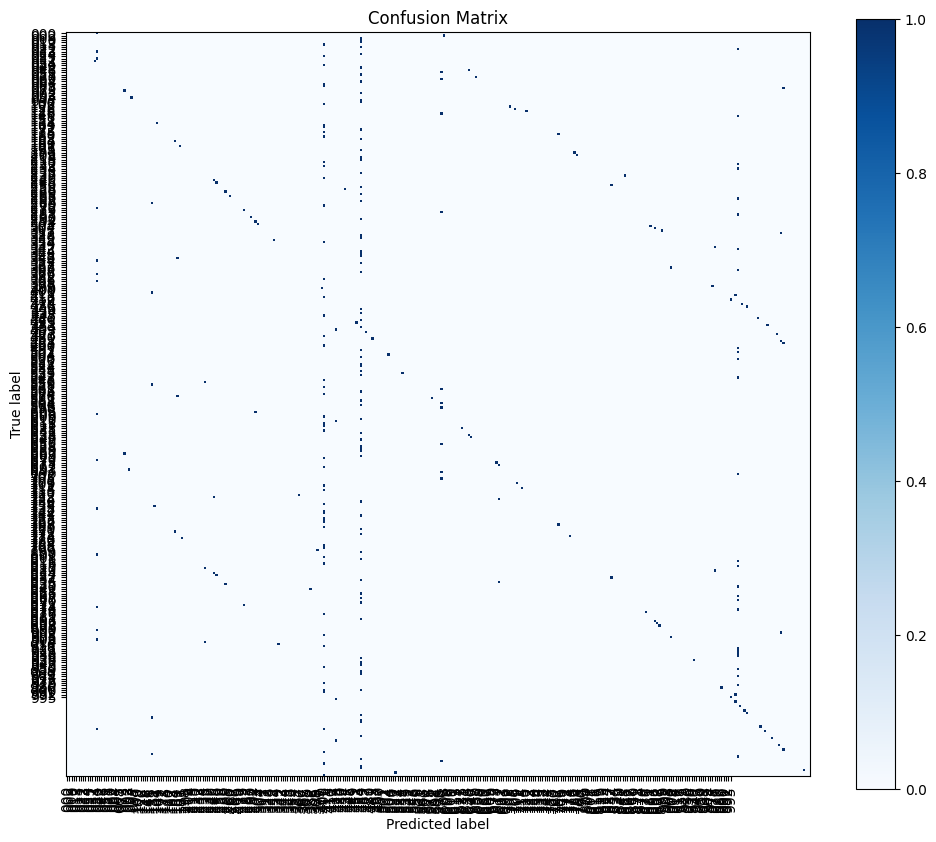

In [ ]:
import pickle
import numpy as np
import os
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Load the trained model
with open("trained_model.pkl", "rb") as f:
    model = pickle.load(f)

# Define the path to the pre-processed test data folder
preprocessed_test_folder = "/content/drive/MyDrive/Pre-processed Data/test"

# Initialize lists to store true and predicted labels
true_labels = []
predicted_labels = []

# Iterate over each folder in the pre-processed test data folder
for folder_name in os.listdir(preprocessed_test_folder):
    folder_path = os.path.join(preprocessed_test_folder, folder_name)

    # Iterate over each .npz file in the folder
    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)

        # Load the preprocessed data from the .npz file
        loaded_data = np.load(file_path, allow_pickle=True)

        # Extract features (combined images) and label (folder name)
        features = loaded_data['combined_image']

        # Perform inference to get predicted label
        predicted_label = model.predict(features.reshape(1, -1))

        # Append true and predicted labels
        true_labels.append(folder_name)
        predicted_labels.append(predicted_label[0])

# Convert lists to numpy arrays
true_labels = np.array(true_labels)
predicted_labels = np.array(predicted_labels)

# Calculate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(12, 10))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted label')
plt.ylabel('True label')

# Set x-axis and y-axis ticks
unique_labels = np.unique(true_labels)
plt.xticks(np.arange(len(unique_labels)), labels=unique_labels, rotation=90)
plt.yticks(np.arange(len(unique_labels)), labels=unique_labels)

plt.show()